### Installation
```shell
conda install pytorch torchvision -c pytorch
```

### Introduction
There are many useful functions in the main module `torch`, including summary statistics, tesor-based functions, deep-learning modules.

In [56]:
import torch
dir(torch)

['AVG',
 'AggregationType',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'Assert',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CONV_BN_FUSION',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeviceObjType',
 'DictType',
 'DisableTorchFunction',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'ExecutionPlan',
 'FUSE_ADD_RELU',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'Gradient',
 'Graph',
 'GraphExecutorState',
 'HOIST_CONV_PACKED_PARAMS',
 'HalfStorage',
 'HalfStorageBase',
 'HalfTensor',
 'INSERT_FOLD_PREPACK_OPS',
 'IODescriptor',
 '

### Example
#### SVD

In [57]:
help(torch.svd)

Help on built-in function svd:

svd(...)
    svd(input, some=True, compute_uv=True, *, out=None) -> (Tensor, Tensor, Tensor)
    
    This function returns a namedtuple ``(U, S, V)`` which is the singular value
    decomposition of a input real matrix or batches of real matrices :attr:`input` such that
    :math:`input = U \times diag(S) \times V^T`.
    
    If :attr:`some` is ``True`` (default), the method returns the reduced singular value decomposition
    i.e., if the last two dimensions of :attr:`input` are ``m`` and ``n``, then the returned
    `U` and `V` matrices will contain only :math:`min(n, m)` orthonormal columns.
    
    If :attr:`compute_uv` is ``False``, the returned `U` and `V` matrices will be zero matrices
    of shape :math:`(m \times m)` and :math:`(n \times n)` respectively. :attr:`some` will be ignored here.
    
    .. note:: The singular values are returned in descending order. If :attr:`input` is a batch of matrices,
              then the singular values of

In [58]:
# sample a 5 x 3 random matrix uniformly
x = torch.randn(5, 3)
print(x.shape)
display(x)

torch.Size([5, 3])


tensor([[-1.1063, -1.0726,  2.8824],
        [ 0.2078,  0.8756, -0.6277],
        [-1.5449,  1.0038, -0.0872],
        [-1.4948, -0.0665,  1.0999],
        [ 0.2222,  0.2099, -0.9666]])

In [59]:
u, s, v = torch.svd(a)
display(u)
display(s)
display(v)

tensor([[ 0.2249, -0.1979, -0.2468],
        [-0.7845, -0.5056, -0.3445],
        [ 0.0609,  0.3645, -0.4327],
        [ 0.2961, -0.0060, -0.7904],
        [-0.4925,  0.7565, -0.0925]])

tensor([2.6717, 2.0848, 0.8035])

tensor([[-0.4187,  0.2715,  0.8666],
        [-0.0761,  0.9404, -0.3314],
        [ 0.9049,  0.2047,  0.3731]])

### Recovery
$X = USV^{\top}$

In [60]:
recovery = torch.matmul(u, torch.matmul(s.diag(), v.t()))
print(recovery.shape)
display(recovery)

torch.Size([5, 3])


tensor([[-0.5354, -0.3681,  0.3853],
        [ 0.3516, -0.7400, -2.2158],
        [-0.1631,  0.8175,  0.1731],
        [-0.8849,  0.1385,  0.4764],
        [ 0.9146,  1.6080, -0.8956]])

### Recovery test

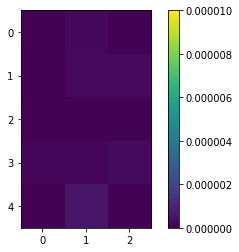

In [61]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(abs(recovery - a).numpy())
plt.colorbar()
plt.clim(0,1e-5)
plt.show()